In [12]:
import sys
sys.path.append(r"C:\pythonprojects\calculas\venv\Lib\site-packages")
import matplotlib.pyplot as plt
import pandas as pd
from jax import vmap,grad
import jax.numpy as jnp
import numpy as np
df = pd.read_csv("C:/Users/ashok/Downloads/prices.csv")
df

,date,price_supplier_a_dollars_per_item,price_supplier_b_dollars_per_item
0,1/02/2016,104,76
1,1/03/2016,108,76
2,1/04/2016,101,84
3,1/05/2016,104,79
4,1/06/2016,102,81
5,1/07/2016,105,84
6,1/08/2016,114,90
7,1/09/2016,102,93
8,1/10/2016,105,93
9,1/11/2016,101,99


In [8]:
### START CODE HERE ### (~ 4 lines of code)
prices_A = df.price_supplier_a_dollars_per_item
prices_B = df.price_supplier_b_dollars_per_item
prices_A = np.array(prices_A).astype('float32')
prices_B = np.array(prices_B).astype('float32')
### END CODE HERE ###
prices_A
prices_B

array([ 76.,  76.,  84.,  79.,  81.,  84.,  90.,  93.,  93.,  99.,  98.,
        96.,  94., 104., 101., 102., 104., 106., 105., 103., 106., 104.,
       113., 115., 114., 124., 119., 115., 112., 111., 106., 107., 108.,
       108., 102., 104., 101., 101., 100., 103., 106., 100.,  97.,  98.,
        90.,  92.,  92.,  99.,  94.,  91.], dtype=float32)

In [9]:
prices_A.mean()

np.float32(100.8)

In [10]:
prices_B.mean()

np.float32(100.0)

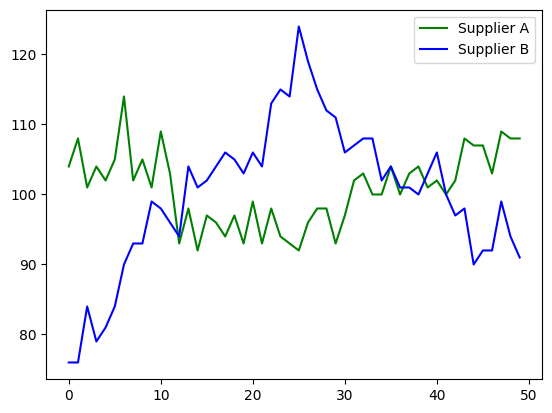

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(prices_A, 'g', label="Supplier A")
plt.plot(prices_B, 'b', label="Supplier B")
plt.legend()

plt.show()  #from the figure the price of product from supplier A (Green) is seen more stable than the blue one

In [22]:
def f_of_omega(omega, pA, pB):
    ### START CODE HERE ### (~ 1 line of code)
    f = (pA * omega) + (pB*(1-omega))
    ### END CODE HERE ###
    return f

def L_of_omega(omega, pA, pB):  #this is our cost function
    return (1/len(f_of_omega(omega, pA, pB))) * np.sum((f_of_omega(omega, pA, pB) - np.mean(f_of_omega(omega, pA, pB)))**2)  #cost function

In [23]:
f_of_omega(0.5,prices_A,prices_B)

array([ 90. ,  92. ,  92.5,  91.5,  91.5,  94.5, 102. ,  97.5,  99. ,
       100. , 103.5,  99.5,  93.5, 101. ,  96.5,  99.5, 100. , 100. ,
       101. ,  98. , 102.5,  98.5, 105.5, 104.5, 103.5, 108. , 107.5,
       106.5, 105. , 102. , 101.5, 104.5, 105.5, 104. , 101. , 104. ,
       100.5, 102. , 102. , 102. , 104. , 100. ,  99.5, 103. ,  98.5,
        99.5,  97.5, 104. , 101. ,  99.5], dtype=float32)

In [24]:
len(f_of_omega(0.5,prices_A,prices_B))

50

In [28]:
omega_array = np.linspace(0, 1, 1001, endpoint=True)
omega_array[:10]

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

In [32]:
#passing all the possible omegas from 0 to 1 at the interval of 0.001
# Parameter endpoint=True will allow ending point 1 to be included in the array.
# This is why it is better to take N = 1001, not N = 1000
N = 1001
omega_array = np.linspace(0, 1, N, endpoint=True)  #all the possibe omega values including the endpoint too

# This is organised as a function only for grading purposes.
def L_of_omega_array(omega_array, pA, pB):
    N = len(omega_array)
    L_array = np.zeros(N)   #this is our array which stores the result of cost function obtained by using each omega values from omega array

    for i in range(N):
        ### START CODE HERE ### (~ 2 lines of code)
        L = L_of_omega(omega_array[i], pA, pB)  #calculating the cost function using current i indexed omega from omega array
        L_array[i] =L    
        ### END CODE HERE ###
        
    return L_array

L_array = L_of_omega_array(omega_array, prices_A, prices_B)
print("L(omega = 0) =",L_array[0])
print("L(omega = 1) =",L_array[N-1])



L(omega = 0) = 110.72
L(omega = 1) = 27.48


np.float64(83.88119999999999)

In [34]:
small_cost_index= L_array.argmin()  #this gives us the index having the lowest value in the array
small_cost_index

np.int64(702)

In [36]:
required_omega = omega_array[small_cost_index]    #this is the required omega value for minimal cost function
required_omega

np.float64(0.7020000000000001)

In [40]:
#this function uses the derivative of the cost function inorder to find the required omega value,
#choosing the minimum derivative value close to 0

def dLdOmega_of_omega_array(omega_array, pA, pB):
    N = len(omega_array)
    dLdOmega_array = np.zeros(N)

    for i in range(N):
        ### START CODE HERE ### (~ 2 lines of code)
        dLdOmega = grad(L_of_omega)(omega_array[i], pA, pB)  #calculating the derivative of the function that calculates the cost function using the jax grad api
        dLdOmega_array[i] = dLdOmega
        ### END CODE HERE ###
        
    return dLdOmega_array

dLdOmega_array = dLdOmega_of_omega_array(omega_array, prices_A, prices_B)
index_of_minderivative = np.abs(dLdOmega_array).argmin()
index_of_minderivative


np.int64(702)

In [42]:
omega_minimum=omega_array[index_of_minderivative]
omega_minimum

np.float64(0.7020000000000001)